In [22]:
import numpy as np 
import pandas as pd  
import seaborn as sns

In [23]:
data=pd.read_csv("ind.csv")

In [24]:
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


In [25]:
data.shape

(9390, 44)

In [26]:
data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [27]:
#drop unsue column 
data.drop(columns=['Unnamed: 0','Resale','MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall','Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School','24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter','Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine','Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable','BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV','DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator','Latitude','Longitude'],inplace=True)

In [28]:
data.head()

,Price,Area,Location,No. of Bedrooms,City
0,300.00,3340,JP Nagar Phase 1,4.0,Banglore
1,83.58,1675,Doddanekundi,3.0,Banglore
2,68.45,1670,Kengeri,3.0,Banglore
3,67.97,1220,Horamavu,2.0,Banglore
4,200.00,2502,Thanisandra,4.0,Banglore


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            9390 non-null   float64
 1   Area             9390 non-null   int64  
 2   Location         9390 non-null   object 
 3   No. of Bedrooms  9390 non-null   float64
 4   City             9390 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 366.9+ KB


In [30]:
#convort No. of Bedrooms column float to int 
#store bedrom column 
data["bedrom"]=data["No. of Bedrooms"].astype('int')

In [31]:
data.head()

,Price,Area,Location,No. of Bedrooms,City,bedrom
0,300.00,3340,JP Nagar Phase 1,4.0,Banglore,4
1,83.58,1675,Doddanekundi,3.0,Banglore,3
2,68.45,1670,Kengeri,3.0,Banglore,3
3,67.97,1220,Horamavu,2.0,Banglore,2
4,200.00,2502,Thanisandra,4.0,Banglore,4


In [32]:
#drop No. of Bedrooms column 
data.drop(columns=["No. of Bedrooms"],inplace=True)

In [33]:
data.head()

,Price,Area,Location,City,bedrom
0,300.00,3340,JP Nagar Phase 1,Banglore,4
1,83.58,1675,Doddanekundi,Banglore,3
2,68.45,1670,Kengeri,Banglore,3
3,67.97,1220,Horamavu,Banglore,2
4,200.00,2502,Thanisandra,Banglore,4


In [45]:
#removing leading and ending space 
data["Location"]=data["Location"].apply(lambda x:x.strip())
#if the number of area occor less then 5 time then fill with other 
location_count=data["Location"].value_counts()
location_less_5=location_count[location_count<=5] 
data["Location"]=data["Location"].apply(lambda x:"other" if x in location_less_5 else x)

In [46]:
data.shape

(9390, 5)

In [47]:
data["Location"].value_counts()

other               1593
Kharghar             322
Dwarka Mor           254
Uttam Nagar          246
Kukatpally           163
                    ... 
Nayandahalli          11
Egmore                11
JP Nagar Phase 7      11
Dombivali East        11
Kachiguda             11
Name: Location, Length: 213, dtype: int64

In [52]:
#explor area column 
data["Area"].isnull().sum()

0

In [53]:
data["Area"].describe()

count    9390.000000
mean     1354.274973
std       719.154146
min       200.000000
25%       924.250000
50%      1200.000000
75%      1610.000000
max      9900.000000
Name: Area, dtype: float64

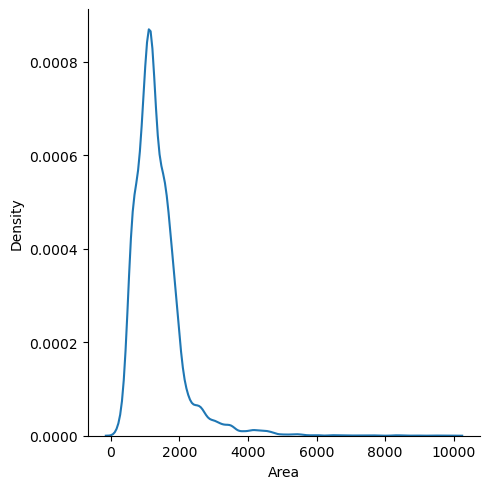

In [55]:
sns.displot(data["Area"],kind="kde")

<Axes: >

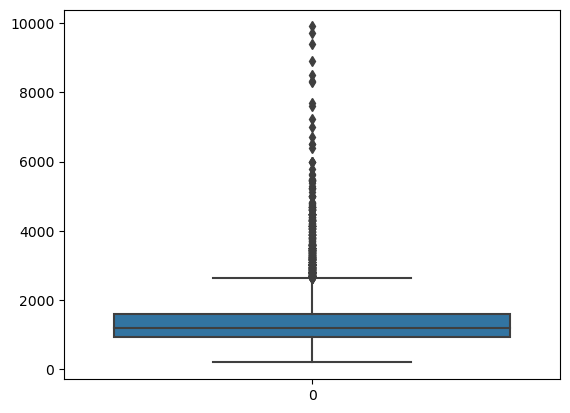

In [56]:
#boxplot show the out li
sns.boxplot(data["Area"])

In [57]:
#set lower bound 400 
data=data[((data["Area"]/data["bedrom"])>=400)] 

In [58]:
data["Area"].describe()

count    7849.000000
mean     1465.978978
std       729.416225
min       400.000000
25%      1050.000000
50%      1307.000000
75%      1696.000000
max      9900.000000
Name: Area, dtype: float64

In [59]:
#removing outli using IQR 
area25=data["Area"].quantile(0.25)
area75=data["Area"].quantile(0.75)

In [60]:
area_iqr=area75-area25

In [61]:
area_iqr

646.0

In [62]:
lower_limit=area25-1.5*area_iqr
upper_limit=area75+1.5*area_iqr

In [63]:
data=data[data["Area"]<=upper_limit]

In [64]:
data.shape

(7430, 5)

In [67]:
#explor price column
data["Price"].isnull().sum()

0

In [68]:
data["Price"].describe()

count    7430.000000
mean       98.618603
std        81.580092
min        20.000000
25%        49.565000
50%        75.915000
75%       122.000000
max      1800.000000
Name: Price, dtype: float64

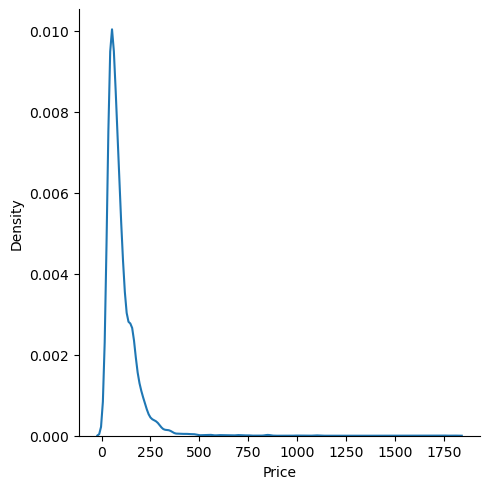

In [72]:
sns.displot(data["Price"],kind="kde")

In [74]:
pric_per25=data["Price"].quantile(0.25)
price_per75=data["Price"].quantile(0.75)

In [75]:
price_iqr=price_per75-pric_per25

In [76]:
price_lower_limit=pric_per25-1.5*price_iqr 
price_upper_limit=price_per75+1.5*price_iqr

In [77]:
print(price_lower_limit,price_upper_limit)

-59.087500000000006 230.6525


In [78]:
data=data[data["Price"]<=price_upper_limit]

In [81]:
data.shape

(7091, 5)

In [82]:
data.describe()

,Price,Area,bedrom
count,7091.000000,7091.000000,7091.000000
mean,86.646202,1315.230997,2.359893
std,48.009725,427.322166,0.699340
min,20.000000,400.000000,1.000000
25%,48.605000,1022.000000,2.000000
50%,73.000000,1260.000000,2.000000
75%,112.000000,1600.000000,3.000000
max,230.000000,2665.000000,5.000000


In [83]:
data.head()

,Price,Area,Location,City,bedrom
1,83.58,1675,Doddanekundi,Banglore,3
2,68.45,1670,other,Banglore,3
3,67.97,1220,Horamavu,Banglore,2
4,200.00,2502,Thanisandra,Banglore,4
5,71.05,1438,Ramamurthy Nagar,Banglore,3


In [84]:
data.to_csv("clean_data.csv")

In [85]:
clean_data=pd.read_csv("clean_data.csv")

In [87]:
x=clean_data.drop(columns=['Unnamed: 0','Price'])

In [89]:
y=data["Price"]

## bullid the model 

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.preprocessing import OneHotEncoder,StandardScaler 
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import r2_score

In [93]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)

3529     48.80
7878     99.00
7061     81.50
1356     79.95
1605    101.00
         ...  
407     105.00
5293    115.00
8106     93.00
5818     39.00
9019    130.00
Name: Price, Length: 5672, dtype: float64

In [99]:
column_transform=make_column_transformer((OneHotEncoder(sparse=False),['Location','City']),remainder='passthrough')

In [100]:
column_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['Location', 'City'])])

In [101]:
#all unit come under on unit
stander_scal=StandardScaler()

In [102]:
liner_reg=LinearRegression()

In [103]:
pip_line=make_pipeline(column_transform,stander_scal,liner_reg)

In [104]:
pip_line.fit(x_tr,y_tr)

/home/sahil/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location', 'City'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [105]:
error=pip_line.predict(x_ts)

In [107]:
r2_score(y_ts,error)

0.8105536493642371

In [108]:
ridge_reg=Ridge()

In [109]:
redg_pip=make_pipeline(column_transform,stander_scal,ridge_reg)

In [110]:
redg_pip.fit(x_tr,y_tr)

/home/sahil/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location', 'City'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [111]:
redge_error=redg_pip.predict(x_ts)

In [112]:
r2_score(y_ts,redge_error)

0.8104949980887333

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
mean_squared_error(y_ts,redge_error)

455.8422019062395

In [115]:
mean_squared_error(y_ts,error)

455.70112000180103

In [116]:
#test 
test_data={"Area":[1220],"Location":["Horamavu"],"City":["Banglore"],"bedrom":[2]}

In [117]:
test_data=pd.DataFrame(test_data)

In [118]:
test_data

,Area,Location,City,bedrom
0,1220,Horamavu,Banglore,2


In [119]:
pip_line.predict(test_data)

array([60.25974418])

In [120]:
#dump into a pickle file  
import pickle 


In [121]:
pickle.dump(pip_line,open("indhouse.pkl","wb"))